<a href="https://colab.research.google.com/github/FAtheme/Classification-of-Handwritten-Digits/blob/main/Classification_of_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Handwritten Digits (Chapter 10 of Elden's Book)
### *By Fatemeh Barati (4023245503)*
## Our dataset: the USPS Handwritten Digits Dataset
For building our Neural Network, we will be using the USPS Handwritten Digits Dataset. It is a dataset made available in Hull (1994).

Let's now take a look at the data in a bit more detail. In order for easy accessibility, we have made available the dataset in our Extra Keras Datasets package which can be installed really easily: pip install extra-keras-datasets. We can then call load_data(...) to load the data.

## Adding the imports

In [ ]:
!pip install extra_keras_datasets

In [ ]:
from extra_keras_datasets import usps
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Specifying the configuration options

In [ ]:
# Configuration options
batch_size = 250
no_epochs = 150
validation_split_size = 0.20
verbosity = 1
optimizer = Adam()
loss_function = categorical_crossentropy
additional_metrics = ['accuracy']

## Loading the dataset

In [ ]:
# Load dataset
(X_train, y_train), (X_test, y_test) = usps.load_data()

In [ ]:
# Set to [0, 1] range
X_train = X_train / 255.0
X_test  = X_test / 255.0

# Reshape 2D grayscale data into 2D-grayscale-with-one-channel data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Convert targets into one-hot encoded format
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

## Creating the model skeleton

In [ ]:
# Input shape
input_shape = X_train[0].shape
print(f'Input shape = {input_shape}')

Input shape = (16, 16, 1)


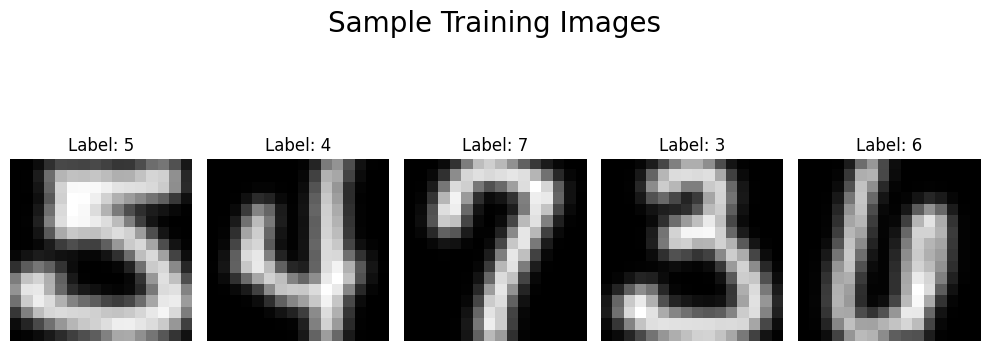

In [ ]:
# Display some examples from the training set
plt.figure(figsize=(10, 5))
for i in range(1, 6):  # Display the first 5 images
    plt.subplot(1, 5, i)
    img = X_train[i].reshape(16, 16)  # Reshape the flat image to 16x16
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=20)
plt.show()

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 8)         1160      
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 32)                36896     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 38546 (150.57 KB)
Trainable params: 38546 (150.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Compiling the model

In [ ]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=additional_metrics)

## Fitting data to the model

In [ ]:
# Fit data to model
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split_size)

Epoch 1/150
24/24 [==============================] - 3s 27ms/step - loss: 2.2846 - accuracy: 0.1706 - val_loss: 2.2776 - val_accuracy: 0.1590
Epoch 2/150
24/24 [==============================] - 0s 5ms/step - loss: 2.2537 - accuracy: 0.1903 - val_loss: 2.2485 - val_accuracy: 0.1590
Epoch 3/150
24/24 [==============================] - 0s 6ms/step - loss: 2.1903 - accuracy: 0.2747 - val_loss: 2.1244 - val_accuracy: 0.2954
Epoch 4/150
24/24 [==============================] - 0s 6ms/step - loss: 1.9624 - accuracy: 0.3254 - val_loss: 1.8019 - val_accuracy: 0.3715
Epoch 5/150
24/24 [==============================] - 0s 8ms/step - loss: 1.5660 - accuracy: 0.4885 - val_loss: 1.3878 - val_accuracy: 0.5840
Epoch 6/150
24/24 [==============================] - 0s 11ms/step - loss: 1.1169 - accuracy: 0.7044 - val_loss: 0.9427 - val_accuracy: 0.7252
Epoch 7/150
24/24 [==============================] - 0s 10ms/step - loss: 0.7652 - accuracy: 0.7951 - val_loss: 0.6745 - val_accuracy: 0.7978
Epoch 8/15

In [ ]:
# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]}\nTest accuracy: {score[1]}')

Test loss: 0.40592825412750244
Test accuracy: 0.9152964353561401


In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

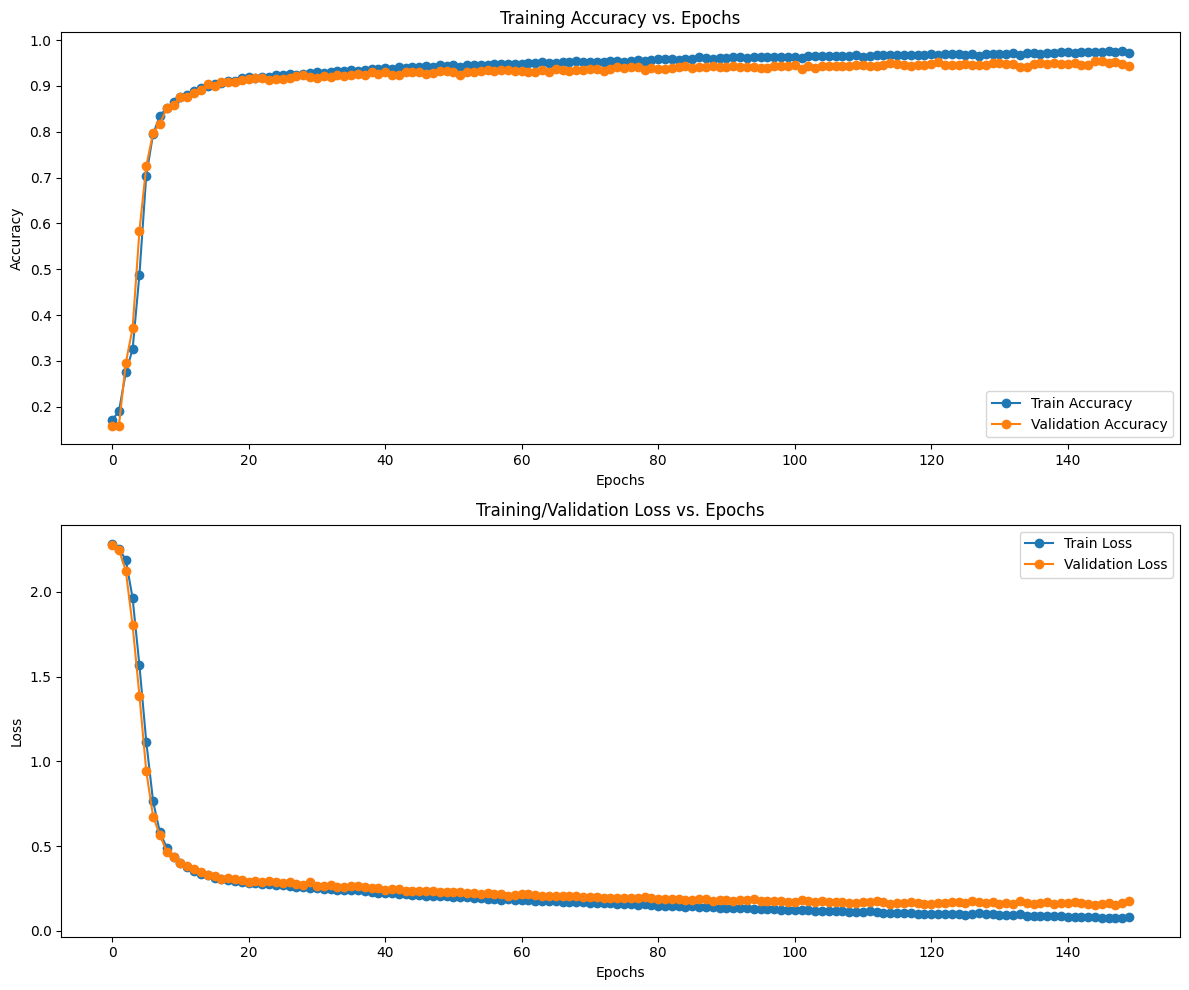

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

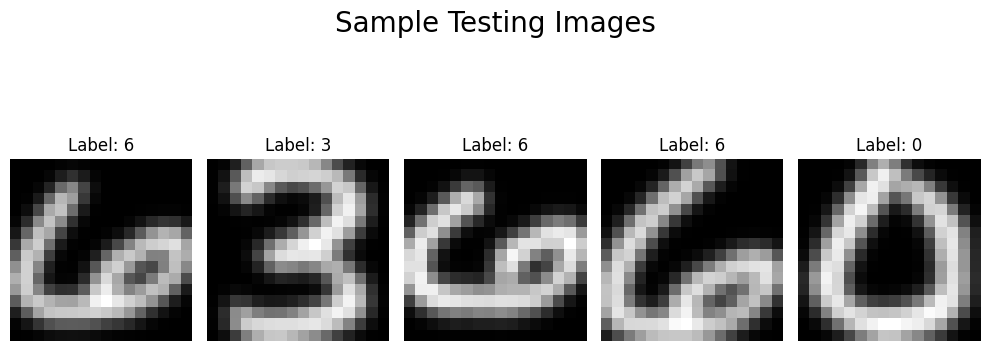

In [ ]:
# Display some examples from the testing set
plt.figure(figsize=(10, 5))
for i in range(1, 6):  # Display the first 5 images
    plt.subplot(1, 5, i)
    img = X_test[i].reshape(16, 16)  # Reshape the flat image to 16x16
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {np.argmax(y_test[i])}")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Sample Testing Images", fontsize=20)
plt.show()